### **The CIFAR-10 dataset**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [ ]:
# Loading the Returns Dataset
from keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [ ]:
print("Length of training data: ", len(train_data))
print("Length of testing data: ", len(test_data))

Length of training data:  50000
Length of testing data:  10000


In [ ]:
#visualize a sample
print("The data: ", train_data[10])
print("It's shape: ", train_data[10].shape)

The data:  [[[53 65 53]
  [54 63 52]
  [56 60 50]
  ...
  [47 51 50]
  [41 45 44]
  [24 28 27]]

 [[46 59 41]
  [53 62 45]
  [54 59 44]
  ...
  [42 46 45]
  [39 43 42]
  [28 32 31]]

 [[45 59 38]
  [50 60 41]
  [46 52 34]
  ...
  [38 42 41]
  [36 40 39]
  [29 33 32]]

 ...

 [[71 83 66]
  [74 83 66]
  [80 85 67]
  ...
  [51 54 33]
  [46 49 34]
  [49 50 41]]

 [[75 82 67]
  [79 85 69]
  [81 85 67]
  ...
  [61 65 41]
  [64 67 48]
  [48 50 41]]

 [[85 83 71]
  [85 84 71]
  [86 86 70]
  ...
  [61 65 39]
  [64 67 46]
  [49 50 41]]]
It's shape:  (32, 32, 3)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


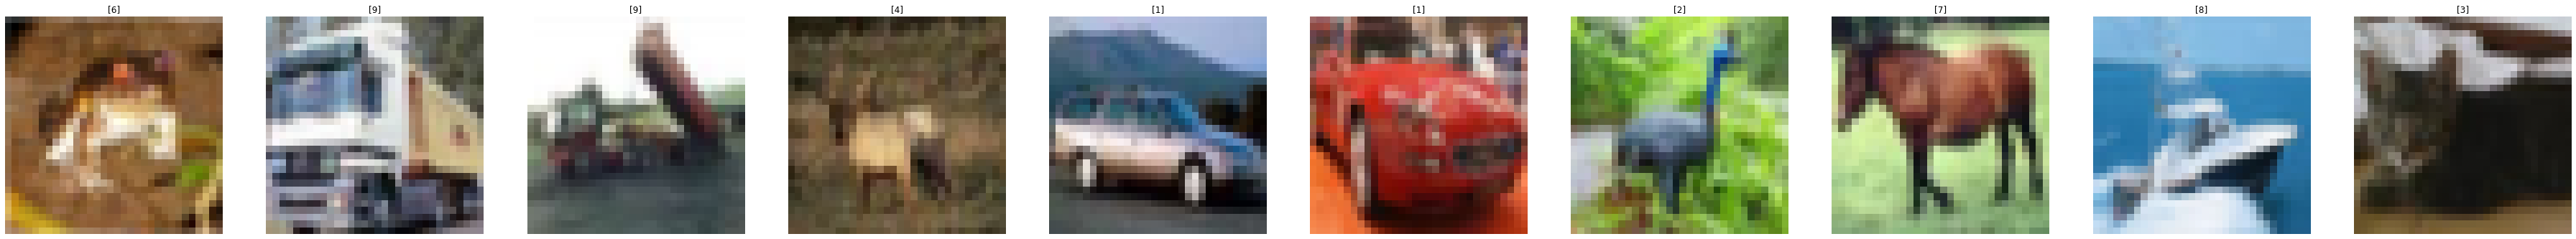

In [ ]:
# Visualizing the dataset
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,10, figsize=(64,64))
for i in range(10):
    ax[i].imshow(train_data[i])
    ax[i].set_title(train_labels[i])
    ax[i].axis('off')

In [ ]:
# Prepare the data
# 1. Encode the train and test data in vectorize sequence
import numpy as np
def vectorize_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape = length of the sequences
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 #set specific indices of results[i] to 1s
  return results
x_train = vectorize_sequences(train_data, 10000)
x_test = vectorize_sequences(test_data, 10000)

In [ ]:
# 2. Encode the train and test labels with one_hot encoding as it is a classification problem and the labels are categorical data
def to_one_hot (labels, dimension=10):
  results = np.zeros((len(labels), dimension))
  for i,label in enumerate(labels):
    results[i, label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# Instead of this function you can use to_categorical method of keras)

In [ ]:
#Checking how the data points are looks like
print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("Y_train: ", one_hot_train_labels.shape)
print("Y_test: ", one_hot_test_labels.shape)

X_train:  (50000, 10000)
X_test:  (10000, 10000)
Y_train:  (50000, 10)
Y_test:  (10000, 10)


In [ ]:
#Buliding The Network
# Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              10241024  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               3

In [ ]:
#compile the model
import numpy as np
from numpy import random as random
import tensorflow as tf
import keras
import keras.backend as K
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Hold-Out validation
num_validation_samples = 10000
np.random.shuffle(x_train)
validation_data = x_train[:num_validation_samples]
x_train = x_train[num_validation_samples:]
training_data = x_train[:]


In [ ]:
num_validation_samples = 10000
np.random.shuffle(one_hot_train_labels)
validation_label = one_hot_train_labels[:num_validation_samples]
one_hot_train_labels = one_hot_train_labels[num_validation_samples:]
training_label = one_hot_train_labels[:]

In [ ]:
#Train the model
#history = model.fit(training_data, training_label, epochs =5, batch_size=256, validation_data=(validation_data,validation_label))

In [ ]:
#let's take a look what the history content
#history_dict = history.history
#history_dict.keys()

In [ ]:
import numpy as np

train_data = x_train
train_targets = one_hot_train_labels
k=2
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []
for i in range(k):
  print("processing fold #", i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples] #Prepare the validation data: data from partition K.
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]], axis=0) #Prepare the training data:data from all other partitions
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]], axis=0)

  #model = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #Builds the keras model already compiled
  model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size=32, verbose = 0) #Trains the model (in silent mode, verbose = 0)
  val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_acc)

processing fold # 0
processing fold # 1


In [ ]:
print("all_validation_scores: ", all_scores)
print("mean: ", np.mean(all_scores))

all_validation_scores:  [0.09934999793767929, 0.09844999760389328]
mean:  0.09889999777078629
